# Bibliotecas

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
from scipy.io import mmread
import time
import sys
from metodos_interativos import (SOR, GradienteConjugadoNormal)
from T2 import (SOR_SparseMatrix, GradienteConjugadoNormalCOO, ProdutoVetorMatrizCOO, GeraVetor_b, OrdenaCOO)

## Matriz baixada

In [116]:
matriz_name = "bcsstk34"

# Le o arquivo e ordena a representação COO da matriz esparsa por linha
sparse_matrix_coo = mmread("./" + matriz_name + "/" + matriz_name +".mtx")
# Gera a forma completa da matriz esparsa
matriz = sparse_matrix_coo.toarray()
# Gera o vetor b com a matriz esparsa
b = GeraVetor_b(matriz)
# Gera um array de todas as posições "j" com elementos não nulos
rows, cols = OrdenaCOO(matriz)

In [117]:
len(rows)

21418

## Matriz dos slides para teste

In [16]:
# matriz_teste = np.array([(0.2,0.1,1,1,0),(0.1,4,-1,1,-1),(1,-1,60,0,-2),(1,1,0,8,4),(0,-1,-2,4,700)])
# b_teste = np.array([1,2,3,4,5])
# rows_teste, cols_teste = OrdenaCOO(matriz_teste)

# Trabalhando com a matriz esparsa sem formato COO

## Metodo SOR

In [95]:
tol_SOR = 10 ** (-3)
max_int = 300
w = 0.5
num_interacoes_SOR = []
ajustes_SOR = []
tempos_SOR = []
erros_SOR = []
while w <= 2.1:
    tempo_matriz_completa1 = time.time()
    sol_SOR, num_int_SOR = SOR(matriz, b, tol_SOR, max_int, w)
    tempo_matriz_completa2 = time.time()
    erro_SOR = (sol_SOR - np.ones(len(sol_SOR)))**(2)
    ajustes_SOR.append(w)
    num_interacoes_SOR.append(num_int_SOR)
    tempos_SOR.append(tempo_matriz_completa2 - tempo_matriz_completa1)
    erros_SOR.append(sum(erro_SOR))
    print("coeficiente de ajuste: ",w)
    w += 0.1

df_analise_SOR = pd.DataFrame({"coef_ajuste": ajustes_SOR, 
                               "num_interacoes": num_interacoes_SOR, 
                               "tempos": tempos_SOR, 
                               "erros": erros_SOR, 
                               "tolerancia": tol_SOR})

coeficiente de ajuste:  0.5
coeficiente de ajuste:  0.6
coeficiente de ajuste:  0.7
coeficiente de ajuste:  0.7999999999999999
coeficiente de ajuste:  0.8999999999999999
coeficiente de ajuste:  0.9999999999999999
coeficiente de ajuste:  1.0999999999999999
coeficiente de ajuste:  1.2
coeficiente de ajuste:  1.3
coeficiente de ajuste:  1.4000000000000001
coeficiente de ajuste:  1.5000000000000002
coeficiente de ajuste:  1.6000000000000003
coeficiente de ajuste:  1.7000000000000004
coeficiente de ajuste:  1.8000000000000005
coeficiente de ajuste:  1.9000000000000006
coeficiente de ajuste:  2.0000000000000004


## Metodo do conjugado gradiente

In [96]:
num_interacoes_gradConjugado = []
erros_gradienteConjugado = []
tempos_gradConjugado = []
tolerancias_gradConjugado = []
i = -1
while i >= -10:
    tolerancia = 10 ** (i)
    tempo_gradConjugado1 = time.time()
    x, k = GradienteConjugadoNormal(matriz, b, len(matriz), tolerancia)
    tempo_gradConjugado2 = time.time()
    erro_SOR_COO = (x - np.ones(len(x)))**(2)
#     print("interacoes necessarias: ", k," - erro cometido: ", erro.dot(erro))
    print("tolerancia: ", i)
    num_interacoes_gradConjugado.append(k)
    erros_gradienteConjugado.append(sum(erro_SOR_COO))
    tempos_gradConjugado.append(tempo_gradConjugado2 - tempo_gradConjugado1)
    tolerancias_gradConjugado.append(i)
    i -= 1
    
df_analise_gradienteConjugado = pd.DataFrame({"num_interacoes": num_interacoes_gradConjugado, 
                                              "tempos": tempos_gradConjugado, 
                                              "erros": erros_gradienteConjugado, 
                                              "tolerancia": tolerancias_gradConjugado})

tolerancia:  -1
tolerancia:  -2
tolerancia:  -3
tolerancia:  -4
tolerancia:  -5
tolerancia:  -6
tolerancia:  -7
tolerancia:  -8
tolerancia:  -9
tolerancia:  -10


# Trabalhando com a matriz esparsa no formato COO

## Metodo SOR

In [97]:
tol_SOR_COO = -1
df_analise_SOR_COO = pd.DataFrame({"coef_ajuste": [], 
                                   "num_interacoes": [], 
                                   "tempos": [], 
                                   "erros": [],
                                   "tolerancia": []})
while tol_SOR_COO >= -10:
    print("tolerancia: ", tol_SOR_COO)
    max_int = 300
    w = 0.5
    num_interacoes_SOR_COO = []
    ajustes_SOR_COO = []
    tempos_SOR_COO = []
    erros_SOR_COO = []
    while w < 2.1:
        tempo_matriz_COO_1 = time.time()
        sol_SOR_COO, num_int_SOR_COO = SOR_SparseMatrix(matriz, b, rows, cols, w, 10**(tol_SOR_COO), max_int)
        tempo_matriz_COO_2 = time.time()
        erro_SOR_COO = (sol_SOR_COO - np.ones(len(sol_SOR_COO)))**(2)
        ajustes_SOR_COO.append(w)
        num_interacoes_SOR_COO.append(num_int_SOR_COO)
        tempos_SOR_COO.append(tempo_matriz_COO_2 - tempo_matriz_COO_1)
        erros_SOR_COO.append(sum(erro_SOR_COO))
        w += 0.1
    df_aux = pd.DataFrame({"coef_ajuste": ajustes_SOR_COO, 
                           "num_interacoes": num_interacoes_SOR_COO, 
                           "tempos": tempos_SOR_COO, 
                           "erros": erros_SOR_COO, 
                           "tolerancia": tol_SOR_COO})
    df_analise_SOR_COO = pd.concat([df_analise_SOR_COO, df_aux])
    tol_SOR_COO -= 1
    
df_analise_SOR_COO = df_analise_SOR_COO.reset_index()

tolerancia:  -1
tolerancia:  -2
tolerancia:  -3
tolerancia:  -4
tolerancia:  -5
tolerancia:  -6
tolerancia:  -7
tolerancia:  -8
tolerancia:  -9
tolerancia:  -10


In [98]:
df_analise_SOR

,coef_ajuste,num_interacoes,tempos,erros,tolerancia
0,0.5,261,43.808079,0.051844,0.001
1,0.6,217,37.095699,0.042527,0.001
2,0.7,182,30.836909,0.042097,0.001
3,0.8,159,27.023398,0.038989,0.001
4,0.9,145,25.101355,0.032310,0.001
5,1.0,133,23.235132,0.029602,0.001
6,1.1,127,21.296755,0.026555,0.001
7,1.2,126,20.638612,0.028098,0.001
8,1.3,151,25.127905,0.013506,0.001
9,1.4,174,29.052889,0.010556,0.001


In [99]:
df_analise_SOR_COO[df_analise_SOR_COO.tolerancia == -3]

,index,coef_ajuste,num_interacoes,tempos,erros,tolerancia
32,0,0.5,261.0,4.639472,0.051844,-3.0
33,1,0.6,217.0,3.966083,0.042527,-3.0
34,2,0.7,182.0,3.326216,0.042097,-3.0
35,3,0.8,159.0,2.855480,0.038989,-3.0
36,4,0.9,145.0,2.705562,0.032310,-3.0
37,5,1.0,133.0,2.794687,0.029602,-3.0
38,6,1.1,127.0,2.401452,0.026555,-3.0
39,7,1.2,126.0,2.362883,0.028098,-3.0
40,8,1.3,151.0,2.851513,0.013506,-3.0
41,9,1.4,174.0,3.248167,0.010556,-3.0


## Metodo do Gradiente Conjugado

### Matriz baixada

In [100]:
num_interacoes_gradConjugado_COO = []
erros_gradienteConjugado_COO = []
tempos_gradConjugado_COO = []
tolerancias_gradConjugado_COO = []
i = -1
while i >= -10:
    tolerancia_COO = 10 ** (i)
    tempo_gradConjugado_COO1 = time.time()
    x_COO, k_COO = GradienteConjugadoNormalCOO(matriz, rows, cols, b, len(matriz), tolerancia_COO)
    tempo_gradConjugado_COO2 = time.time()
    erro_GradConjugado_COO = (x_COO - np.ones(len(x_COO)))**(2)
#     print("interacoes necessarias: ", k," - erro cometido: ", erro.dot(erro))
    print("tolerancia: ", i)
    num_interacoes_gradConjugado_COO.append(k_COO)
    erros_gradienteConjugado_COO.append(sum(erro_GradConjugado_COO))
    tempos_gradConjugado_COO.append(tempo_gradConjugado_COO2 - tempo_gradConjugado_COO1)
    tolerancias_gradConjugado_COO.append(i)
    i -= 1
    
df_analise_gradienteConjugado_COO = pd.DataFrame({"num_interacoes": num_interacoes_gradConjugado_COO, 
                                                  "tempos": tempos_gradConjugado_COO, 
                                                  "erros": erros_gradienteConjugado_COO, 
                                                  "tolerancia": tolerancias_gradConjugado_COO})

tolerancia:  -1
tolerancia:  -2
tolerancia:  -3
tolerancia:  -4
tolerancia:  -5
tolerancia:  -6
tolerancia:  -7
tolerancia:  -8
tolerancia:  -9
tolerancia:  -10


In [101]:
df_analise_gradienteConjugado

,num_interacoes,tempos,erros,tolerancia
0,589,0.094468,6.556631e-08,-1
1,589,0.032515,6.556631e-08,-2
2,589,0.030022,6.556631e-08,-3
3,589,0.027814,6.556631e-08,-4
4,589,0.028607,6.556631e-08,-5
5,589,0.027731,6.556631e-08,-6
6,589,0.029436,6.556631e-08,-7
7,589,0.054381,6.556631e-08,-8
8,589,0.035596,6.556631e-08,-9
9,589,0.030006,6.556631e-08,-10


In [102]:
df_analise_gradienteConjugado_COO

,num_interacoes,tempos,erros,tolerancia
0,589,10.282191,6.378913e-08,-1
1,589,10.774627,6.378913e-08,-2
2,589,10.729409,6.378913e-08,-3
3,589,11.057798,6.378913e-08,-4
4,589,10.579430,6.378913e-08,-5
5,589,11.534456,6.378913e-08,-6
6,589,12.088627,6.378913e-08,-7
7,589,11.577661,6.378913e-08,-8
8,589,11.457863,6.378913e-08,-9
9,589,11.124917,6.378913e-08,-10


### Matriz teste

In [272]:
# tolerancia = 10 ** (-10)
# x_teste, k_teste = GradienteConjugadoNormal(matriz_teste, rows_teste, cols_teste, b_teste, len(matriz_teste), tolerancia)
# print(k_teste)
# print(x_teste)
# print(max(x_teste - np.ones(len(x_teste))))
# if max(x_teste - np.ones(len(x_teste))) <= tolerancia: print(True)

# Analise resultados

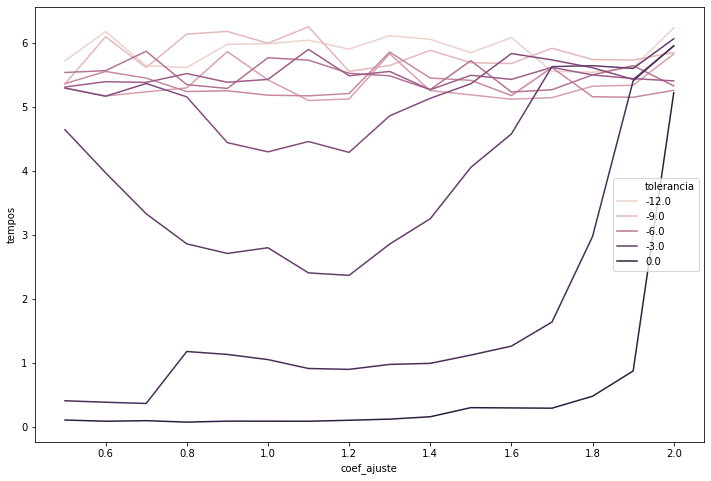

In [103]:
plt.pyplot.figure(figsize=(12,8))
sns.lineplot(x="coef_ajuste",y="tempos", data=df_analise_SOR_COO, hue="tolerancia", markers=True)

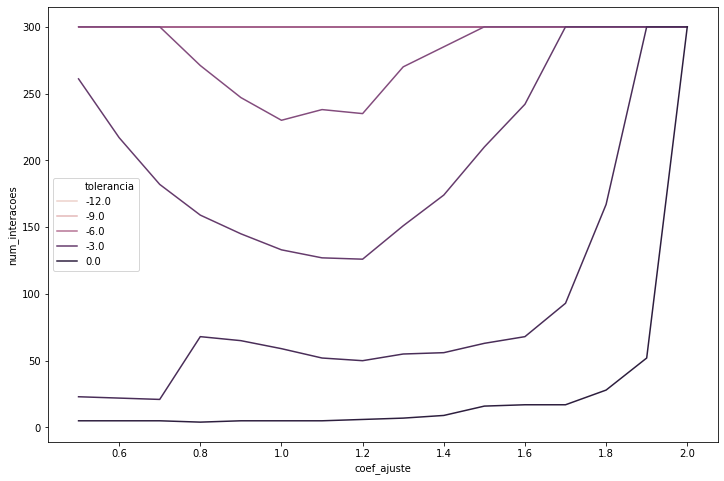

In [104]:
plt.pyplot.figure(figsize=(12,8))
sns.lineplot(x="coef_ajuste",y="num_interacoes", data=df_analise_SOR_COO, hue="tolerancia", markers=True)

In [105]:
i = -1
list_comp_interacoes = []
list_comp_erros = []
list_comp_coef = []
list_tol = []
while i >= -10:
    num_interacoes_min = df_analise_SOR_COO[df_analise_SOR_COO.tolerancia == i].num_interacoes.min()
    list_comp_interacoes.append(num_interacoes_min)
    df_aux = df_analise_SOR_COO[(df_analise_SOR_COO.tolerancia == i) & (df_analise_SOR_COO.num_interacoes == num_interacoes_min)]
    erro_min = df_aux.erros.min()
    list_comp_erros.append(erro_min)
    df_aux = df_aux[df_aux.erros == erro_min]
    max_coef = df_aux.coef_ajuste.max()
    list_comp_coef.append(max_coef)
    list_tol.append(i)
    i -= 1

In [106]:
df_comparacao_SOR = pd.DataFrame({"num_interacoes": list_comp_interacoes, 
                                  "erros": list_comp_erros, 
                                  "coeficiente_min": list_comp_coef, 
                                  "tolerancia": list_tol})

In [107]:
df_analise_gradienteConjugado_COO

,num_interacoes,tempos,erros,tolerancia
0,589,10.282191,6.378913e-08,-1
1,589,10.774627,6.378913e-08,-2
2,589,10.729409,6.378913e-08,-3
3,589,11.057798,6.378913e-08,-4
4,589,10.579430,6.378913e-08,-5
5,589,11.534456,6.378913e-08,-6
6,589,12.088627,6.378913e-08,-7
7,589,11.577661,6.378913e-08,-8
8,589,11.457863,6.378913e-08,-9
9,589,11.124917,6.378913e-08,-10


In [108]:
df_comparacao_SOR

,num_interacoes,erros,coeficiente_min,tolerancia
0,4.0,211.324536,0.8,-1
1,21.0,63.055212,0.7,-2
2,126.0,0.028098,1.2,-3
3,230.0,0.000441,1.0,-4
4,300.0,0.000013,1.2,-5
5,300.0,0.000013,1.2,-6
6,300.0,0.000013,1.2,-7
7,300.0,0.000013,1.2,-8
8,300.0,0.000013,1.2,-9
9,300.0,0.000013,1.2,-10


# Outros

In [325]:
# def SOR(C, A, b, w):
#     x0 = np.array([0.]*len(b))
#     max_iter = 15
#     n = len(b)
#     x = x0
#     EQMs = []
#     steplist = []
#     step = 1
#     while step <= max_iter:
#         print(step)
#         ilist = []
#         for i in C["row"]:
#             if i in ilist: continue
#             else: ilist.append(i)
#             soma1 = 0
#             soma2 = 0
#             for k in range(len(C["row"])):
#                 if C["row"][k] == i:
#                     j = C["col"][k]
#                     if j < i:
#                         soma1 += A[i][j] * x[j]
#                     elif j > i:
#                         soma2 += A[i][j] * x0[j]
#                     else: continue
#             x[i] = ((1-w) * x0[i]) + (w * (b[i] - soma1 - soma2) / A[i][i])
#             print(step)
#             print(x)
#         for i in range(len(x)):
#             x0[i] = x[i]
#         EQ = 0
#         for k in range(len(x)):
#             EQ += (x[k] - 1)**2
#         EQMs.append(EQ / step)
#         steplist.append(step)
#         step += 1
#     return EQMs, steplist

In [326]:
# SOR(C,matriz_teste, b_teste, 1.25)

In [119]:
df_analise_SOR.to_csv("./analise_" + matriz_name + "/SOR.csv")
df_analise_SOR_COO.to_csv("./analise_" + matriz_name + "/SOR_COO.csv")
df_analise_gradienteConjugado.to_csv("./analise_" + matriz_name + "/gradienteConjugado.csv")
df_analise_gradienteConjugado_COO.to_csv("./analise_" + matriz_name + "/gradienteConjugado_COO.csv")
df_comparacao_SOR.to_csv("./analise_" + matriz_name + "/comparacao_SOR.csv")